#### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()


#### from sklearn.feature_extraction.text import CountVectorizer: Convert a collection of text documents to a matrix of token counts This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix

In [2]:
data=pd.read_csv("C:\\Users\\siva\\Desktop\\archive\\Train.csv")
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


#### After reading the csv file which contains 40k movie reviews from IMDB,we see that there are two prominent columns.One being TEXT which contains the review and the other being LABEL which contains O's and 1's ,where 0-NEGATIVE and 1-POSITIVE REVIEW!

In [3]:
data.shape

(40000, 2)

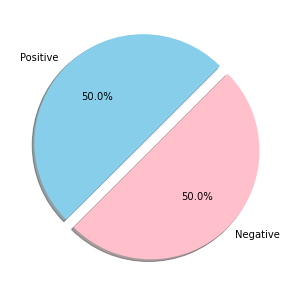

In [4]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=data[data['label']==1]
neg=data[data['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

#### Lets understand how Count Vectorizer works which will be applied later to the dataset!
#### get_feature_names():Array mapping from feature integer indices to feature name.

In [5]:
df=["Hey Jude, refrain Dont carry the world upon your shoulders For well you know that its a fool Who plays it cool By making his world a little colder Na-na-na,a, na Na-na-na, na"]
bag=count.fit_transform(df)
print(count.get_feature_names())

['by', 'carry', 'colder', 'cool', 'dont', 'fool', 'for', 'hey', 'his', 'it', 'its', 'jude', 'know', 'little', 'making', 'na', 'plays', 'refrain', 'shoulders', 'that', 'the', 'upon', 'well', 'who', 'world', 'you', 'your']


#### Now from the array we can infer that conversion a collection of text documents to a matrix of token counts has been done below

In [6]:
print(bag.toarray())

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1 1 1 1 1 1 1 1 2 1 1]]


#### Next we are going to Import RE i.e Regular Expression Operation,we are using this library to remove html tags like '< a >' or .So whenever we come across these tage we replace them with an empty string ''.Next we will also be altering emojis/emoticons which can be smiley :) ,sad face :( or even some upset face :/.We will be shifting the emojis towards the end so that we can get a set of clean text.

In [9]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text 

#### So lets show you some examples to get some clarity incase you did not understand what has happened in the above code

#### So lets call the preprocessing function and pass some text in it and observe the output to understand what exactly is happening when the function is called

In [10]:
preprocessor(data.loc[0,'text'][-50:])

'piens subsp sapiens was a huge error of judgment '

#### In the below text that has been passed in the function we can see that it contains HTML tag and emojis.The text returned will not contain the html tag and the emojis will be pushed towards the end of the text!

In [11]:
preprocessor("<a> this is :(  aweomee wohhhh :)")

' this is aweomee wohhhh :( :)'

#### Now since we have seen the above examples we will be passing the text data from our train dataset to this preprocessor function to clean the data.

In [12]:
data['text']=data['text'].apply(preprocessor)

#### We are importing a new library PorterStemmer from nltk.stem.porter.It follows an algorithm for suffix stripping i.e it will bring the word to its base meaning like running will be changed to run ,eating will be changed to eat.This is for simplifying the data and removing unnecessary complexities in our text data

In [13]:
from nltk.stem.porter import PorterStemmer

porter=PorterStemmer()

In [14]:
def tokenizer(text):
        return text.split()

In [15]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

#### Lets see what will happen to this text that we are passing in the tokenizer function.

In [16]:
tokenizer("Haters love Hating as they Hate")

['Haters', 'love', 'Hating', 'as', 'they', 'Hate']

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

Positive words are as follows


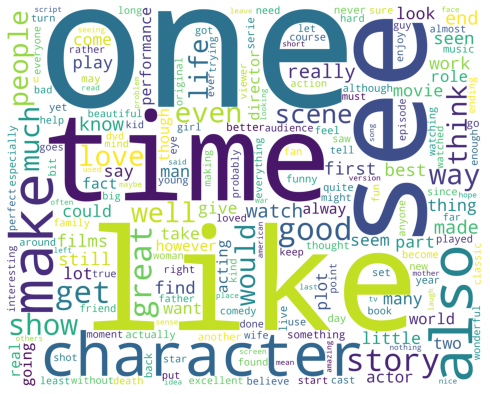

Negative words are as follows


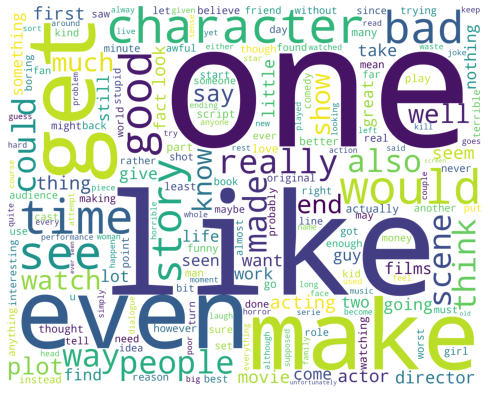

In [19]:
from wordcloud import WordCloud
positivedata = data[ data['label'] == 1]
positivedata =positivedata['text']
negdata = data[data['label'] == 0]
negdata= negdata['text']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

#### Positive words that are highlighted are:love,great,perfect,good,beautiful,nice,excellent

#### Negative words that are highlighted are:awful,waste,problem,stupid,horrible,bad,poor

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)

#### Learn vocabulary and idf, return term-document matrix.This is equivalent to fit followed by transform, but more efficiently implemented

In [22]:
y=data.label.values
x=tfidf.fit_transform(data.text)

In [ ]:
from sklearn.model_selection import train_test_split:Split arrays/matrices into train and test subsets

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

#### Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).CV here stands for Cross Validation.The user can pass the number of folds as an argument cv of the function to perform k-fold cross-validation

In [24]:
from sklearn.linear_model import LogisticRegressionCV

clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)

y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:  2.3min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.2min finished


In [25]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.89045


In [26]:
from sklearn.linear_model import SGDClassifier
clf= SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8917


In [29]:
from sklearn.linear_model import LogisticRegressionCV
lg=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred1 = lg.predict(X_test)
from sklearn import metrics

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:  1.9min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  2.9min finished


In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.89045
